<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data</h1>
</center>

## **Deskripsi**

Menggunakan clustering sebagai salah satu metode feature engineering

## **Library Import**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from class_reg_preprocessing import (
    FeatureOutliersHandling,
    FeatureImputer,
    FeatureResampling,
    FeatureLabelEncoder,
    FeatureDiscretizer,
    FeatureRareCategoriesGrouping,
    FeaturePolynomialAdder,
    FeaturePowerTransformer,
    FeatureGroupingNumeric,
    FeatureDimensionReducer,
    FeatureEncoder,
    FeatureScaler,
)

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [40]:
data_path = './data'

**Train**

In [41]:
# TODO: define initial dataframes
initial_df = pd.read_csv(f'{data_path}/EV_data.csv')
# -----------------------------------

initial_df

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,3/31/2021 0:00,0.2125,0.2000,0.1625,0.1750,0.2375,0.2125,0.1875,0.1750,0.2000,...,0.3375,0.3875,0.3375,0.3875,0.2500,0.5125,0.4750,0.2000,57,0
4044,4/1/2021 0:00,0.1625,0.1625,0.1500,0.1500,0.2000,0.1750,0.1625,0.1625,0.1500,...,0.2375,0.2000,0.2125,0.2000,0.2000,0.2875,0.1875,0.2250,57,0
4045,4/2/2021 0:00,0.1625,0.2000,0.2125,0.1625,0.1625,0.1375,0.1500,0.1250,0.1875,...,0.2500,0.2750,0.3750,0.3375,0.3250,0.2625,0.3000,0.3500,57,0
4046,4/3/2021 0:00,0.2250,0.2250,0.1625,0.1750,0.1750,0.1500,0.1500,0.2125,0.1625,...,0.3375,0.4000,0.3500,0.2625,0.4000,0.3375,0.8375,0.6625,57,0


**Test**

In [42]:
# # TODO: define test dataframe
# test_features_df = pd.read_csv(f'{data_path}/test_features.csv')

# submisssion_ids = test_features_df['ID']

# test_features_df = test_features_df.drop(columns=['ID'])
# # -------------------------------------

# test_features_df = test_features_df.reindex(sorted(test_features_df.columns), axis=1)

# test_features_df

**Define Target and Features**

In [43]:
# TODO: define which columns are target labels
label = 'label'
# -----------------------------------
# TODO: define which columns are categorical and which are numerical features
categorical_features = ['id']

# get all columns with float64 and int64 data types
numerical_features = initial_df.select_dtypes(include=['float64']).columns
# -----------------------------------


## **Data Preparation**

### **Drop Unnecessary Columns [TENTATIVE]**

In [44]:
# TODO: define columns to drop
columns_to_drop = ['label', 'read_date']
# -----------------------------------

categorical_features = [col for col in categorical_features if col not in columns_to_drop]
numerical_features = [col for col in numerical_features if col not in columns_to_drop]

### **Drop Duplicates**

In [45]:
print('Row count for initial data before removing duplicates:', len(initial_df))
initial_df.drop_duplicates(inplace=True)
print('Row count for initial data after removing duplicates:', len(initial_df))
initial_df.reset_index(drop=True, inplace=True) # Reset the index after dropping duplicates

Row count for initial data before removing duplicates: 4048
Row count for initial data after removing duplicates: 4048


In [46]:
initial_df = initial_df.drop(columns=columns_to_drop)
# test_features_df = test_features_df.drop(columns=columns_to_drop)

### **Change Wrong Value to NaN [Tentative]**

In [47]:
# wrong_values = '5'

# initial_df['pendidikan'] = initial_df['pendidikan'].replace(wrong_values, np.nan)
# initial_df['status_pernikahan'] = initial_df['status_pernikahan'].replace(wrong_values, np.nan)

# test_features_df['pendidikan'] = test_features_df['pendidikan'].replace(wrong_values, np.nan)
# test_features_df['status_pernikahan'] = test_features_df['status_pernikahan'].replace(wrong_values, np.nan)

#### **Check Similarity Columns between Train and Test**

In [48]:
def is_same_cols(df1: pd.DataFrame, df2: pd.DataFrame, label: str):
    """
    Function to check if two DataFrames have the same columns, excluding the label column if it exists.
    
    Parameters:
    - df1: First DataFrame
    - df2: Second DataFrame
    - label: The name of the label column to exclude from the comparison (default is 'label').
    
    Returns:
    - Boolean value indicating whether the columns are the same, excluding the label column
    """
    # Exclude the label column if it exists in either DataFrame
    df1_cols = df1.columns.drop(label) if label in df1.columns else df1.columns
    df2_cols = df2.columns.drop(label) if label in df2.columns else df2.columns

    # Compare the remaining columns
    return df1_cols.equals(df2_cols)

In [49]:
# print('Initial and test features have the same columns:', is_same_cols(initial_df, test_features_df, label))

### **Grouping by ID**

In [50]:
initial_df = initial_df.groupby(['id']).mean()

In [52]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   interval_1   88 non-null     float64
 1   interval_2   88 non-null     float64
 2   interval_3   88 non-null     float64
 3   interval_4   88 non-null     float64
 4   interval_5   88 non-null     float64
 5   interval_6   88 non-null     float64
 6   interval_7   88 non-null     float64
 7   interval_8   88 non-null     float64
 8   interval_9   88 non-null     float64
 9   interval_10  88 non-null     float64
 10  interval_11  88 non-null     float64
 11  interval_12  88 non-null     float64
 12  interval_13  88 non-null     float64
 13  interval_14  88 non-null     float64
 14  interval_15  88 non-null     float64
 15  interval_16  88 non-null     float64
 16  interval_17  88 non-null     float64
 17  interval_18  88 non-null     float64
 18  interval_19  88 non-null     float64
 19  interval_20  88

### **Clustering**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [22]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               K=n_clusters,
               max_iters=500,
               plot_steps=True
           ),
       ),
   ]
)
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [23]:
sse=[]
silhouette_coefficients = []
for k in range(2,11):
    n_clusters = k
    preprocessor = Pipeline(
        [
            ("scaler", MinMaxScaler()),
            ("pca", PCA(n_components=4, random_state=42)),
        ]
    )
    clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                K=n_clusters,
                max_iters=500,
                plot_steps=True
            ),
        ),
    ]
    )
    pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
    )
    data = initial_df
    pipe.fit(data)
    sse.append(pipe["clusterer"]["kmeans"].inertia_)
    score = silhouette_score(data,pipe["clusterer"]["kmeans"].labels_)
    silhouette_coefficients.append(score)

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '<__main__.KMeans object at 0x1289545b0>' (type <class '__main__.KMeans'>) doesn't

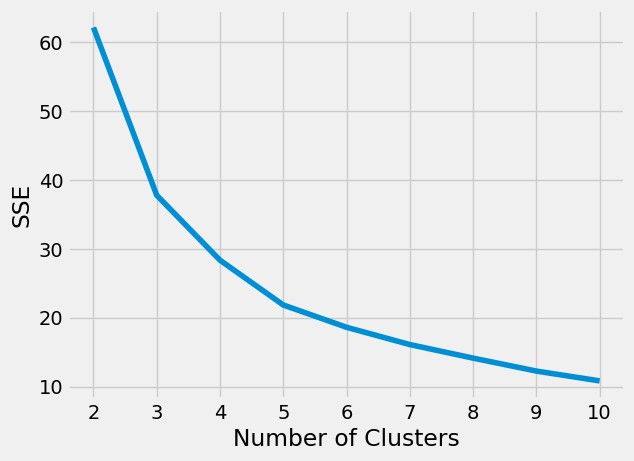

In [100]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [98]:
initial_df['power-usage-class']= pipe["clusterer"]["kmeans"].labels_


In [99]:
initial_df['power-usage-class'].unique()

array([2, 0, 3, 9, 1, 5, 7, 4, 8, 6], dtype=int32)

### **Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = initial_df.drop(columns=[label])
y = initial_df[label]

# X_test = test_features_df

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data:", len(initial_df))
print("Jumlah data train:", len(X_train))
print("Jumlah data validasi:", len(X_val))

Jumlah data: 4048
Jumlah data train: 3238
Jumlah data validasi: 810


In [17]:
print("X_train and X_val have the same columns:", is_same_cols(X_train, X_val, label))
# print("X_test has the same columns as X_train:", is_same_cols(X_train, test_features_df, label))

X_train and X_val have the same columns: True


### **Change Outliers Value to NaN [TENTATIVE: Based on EDA Boxplot]**

#### **Outlier : IForest**

In [18]:
outlier_handler_iforest = FeatureOutliersHandling(
    numerical_features=numerical_features,
    contamination=0.05, 
    outlier_method='iforest'
)

In [19]:
# X_train.isnull().sum()

In [20]:
# X_train = outlier_handler_iforest.fit_transform(X_train)
# X_train.isnull().sum()

#### **Outlier : IQR-ZScore**

In [21]:
# outlier_handler_iqr_zscore = FeatureOutliersHandling(
#     numerical_features=numerical_features, 
#     contamination=0.05, 
#     outlier_method='iqr-zscore'
# )

# outlier_handler_iqr_zscore.plot_boxplots_for_numerical_features(X_train)

In [22]:
# X_train.isnull().sum()

In [23]:
# X_train = outlier_handler_iqr_zscore.fit_transform(X_train, numerical_features_to_handle=numerical_features)

# X_train.isnull().sum()

### **Impute Data**

In [24]:
imputer = FeatureImputer(
    numerical_features=numerical_features,
    categorical_features=categorical_features,
    int_num_features=numerical_features, # depends on the dataset
    imputer_type='iterative',
    num_strategy='mean',
    cat_strategy='most_frequent'
)

In [25]:
X_train.isnull().sum()

read_date      0
interval_1     0
interval_2     0
interval_3     0
interval_4     0
interval_5     0
interval_6     0
interval_7     0
interval_8     0
interval_9     0
interval_10    0
interval_11    0
interval_12    0
interval_13    0
interval_14    0
interval_15    0
interval_16    0
interval_17    0
interval_18    0
interval_19    0
interval_20    0
interval_21    0
interval_22    0
interval_23    0
interval_24    0
interval_25    0
interval_26    0
interval_27    0
interval_28    0
interval_29    0
interval_30    0
interval_31    0
interval_32    0
interval_33    0
interval_34    0
interval_35    0
interval_36    0
interval_37    0
interval_38    0
interval_39    0
interval_40    0
interval_41    0
interval_42    0
interval_43    0
interval_44    0
interval_45    0
interval_46    0
interval_47    0
interval_48    0
id             0
dtype: int64

In [26]:
# X_train = imputer.fit_transform(X_train)
# X_val = imputer.transform(X_val)
# # X_test = imputer.transform(X_test)

# X_train.isnull().sum()

### **Resampling [TENTATIVE: Based on Label Distribution]**

In [27]:
# sampling_strategy = {1: 786, 2: 786}

# resampler = FeatureResampling(
#     resampling_method='oversampling',
#     categorical_features=categorical_features,
#     sampling_strategy=sampling_strategy,
#     random_state=42
# )

In [28]:
# resampler.plot_class_count(y_train, title="Distribusi Kelas Sebelum Oversampling")

In [29]:
# X_train, y_train = resampler.fit_transform(X_train, y_train)

# resampler.plot_class_count(y_train, title="Distribusi Kelas Setelah Oversampling")

### **Encode Label [TENTATIVE: If Label is Categorical Object]**

In [30]:
# label_encoder = FeatureLabelEncoder()

# y_train = label_encoder.fit_transform(y_train)
# y_val = label_encoder.transform(y_val)

# label_encoder.get_encoding_map()

### **Numerical Features : Binning [OPTIONAL: If Necessary]**

In [31]:
discretizer = FeatureDiscretizer(
    n_bins=5,
    encode='ordinal',
    strategy='uniform',
    numerical_features_to_discretize=['tahun_kelahiran']
)

In [32]:
# X_train

In [33]:
# X_train = discretizer.fit_transform(X_train)
# X_val = discretizer.transform(X_val)
# X_test = discretizer.transform(X_test)
# discretizer.get_bin_edges()
# X_train

### **Categorical Features : Rare Categories Grouping [OPTIONAL: If Column has Rare Categories]**

In [34]:
# categorical_features_to_group = ['status_pernikahan', 'pendidikan']

# rare_grouping = FeatureRareCategoriesGrouping(
#     categorical_features=categorical_features_to_group,
#     threshold=0.1,
#     rare_label='Rare'
# )

In [35]:
# for feature in categorical_features_to_group:
#     print(f"Value counts for {feature} before rare category grouping:")
#     print(X_train[feature].value_counts(normalize=True))

In [36]:
# X_train = rare_grouping.fit_transform(X_train)
# X_val = rare_grouping.transform(X_val)
# X_test = rare_grouping.transform(X_test)

# for feature in categorical_features_to_group:
#     print(f"Value counts for {feature} after rare category grouping:")
#     print(X_train[feature].value_counts(normalize=True))

### **Numerical Features : Polynomial Features [OPTIONAL: If Necessary]**

In [37]:
# columns_to_poly = [
#     'pembelian_diskon',
#     'pembelian_toko',
#     'pembelian_web'
# ]

# poly_features_adder = FeaturePolynomialAdder(
#     degree=2,
#     interaction_only=False,
#     include_bias=False,
#     columns=columns_to_poly
# )

In [38]:
# X_train.columns

In [39]:
# X_train = poly_features_adder.fit_transform(X_train)
# X_val = poly_features_adder.transform(X_val)
# X_test = poly_features_adder.transform(X_test)

# X_train.columns

### **Numerical Features : Power Transform [OPTIONAL: If Necessary]**

In [40]:
# numerical_features_to_transform = [
#     'belanja_buah',
#     'belanja_daging',
#     'belanja_ikan',
#     'belanja_kue',
# ]

# # Inisialisasi transformer
# power_transformer = FeaturePowerTransformer(
#     method='yeo-johnson',
#     standardize=True,
#     columns=numerical_features_to_transform
# )

In [41]:
# # Data sebelum transformasi
# X_train_before = X_train[numerical_features_to_transform]

# # Fit dan transform data
# X_train = power_transformer.fit_transform(X_train)
# X_val = power_transformer.transform(X_val)
# X_test = power_transformer.transform(X_test)

# # Data setelah transformasi
# X_train_after = X_train[numerical_features_to_transform]

# # Plot distribusi sebelum dan sesudah transformasi
# power_transformer.plot_kde_hist_before_after(X_train_before, X_train_after)

# # Dapatkan nilai lambda untuk setiap fitur
# print("Lambda values for power transformation:")
# print(power_transformer.get_lambdas())

### **Numerical Features : Grouping (min,max,mean,median,std) [OPTIONAL: If Necessary]**

In [42]:
# numerical_features_to_grouping = [
#     'belanja_buah', 
#     'belanja_daging', 
#     'belanja_ikan', 
#     'belanja_kue'
# ]

# grouping_transformer = FeatureGroupingNumeric(
#     numerical_features_to_grouping=numerical_features_to_grouping,
#     aggregations=['min', 'max', 'mean', 'median', 'std'],
#     columns_name='belanja'
# )

In [43]:
# X_train.columns

In [44]:
# X_train = grouping_transformer.fit_transform(X_train)
# X_val = grouping_transformer.transform(X_val)
# X_test = grouping_transformer.transform(X_test)

# X_train.columns

### **Numerical Features : Dimensionality Reduction [OPTIONAL: If Necessary]**

#### **PCA**

In [ ]:
numeric_features_pca = ['belanja_buah','belanja_daging','belanja_ikan','belanja_kue']
n_components = 4

reducer = FeatureDimensionReducer(
    method='pca',
    n_components=n_components,
    numeric_features_to_reduce=numeric_features_pca,
    column_names='belanja_pca'
)

In [ ]:
X_train

In [ ]:
X_train = reducer.fit_transform(X_train) 

print(f"Explained variance ratio for {n_components} components:\n", reducer.get_variance_ratio())

In [ ]:
X_val_pca = reducer.transform(X_val)
# X_test_pca = reducer.transform(X_test)

In [ ]:
X_train

#### **LDA**

In [ ]:
numeric_features_lda = ['pembelian_diskon','pembelian_toko','pembelian_web']
n_components = 2

reducer = FeatureDimensionReducer(
    method='lda',
    n_components=n_components,
    numeric_features_to_reduce=numeric_features_lda,
    column_names='pembelian_lda'
)


In [ ]:
# X_train

In [ ]:
# X_train = reducer.fit_transform(X_train, y_train)
# X_val_lda = reducer.transform(X_val)
# X_test_lda = reducer.transform(X_test)

In [ ]:
# X_train

### **Encode Categorical Features**

In [ ]:
# TODO: Define the ordinal features from the categorical features
ordinal_features_dict = {
    # 'pendidikan': ['SMP', 'SMA', 'Sarjana', 'Magister', 'Doktor'],
    'status_pernikahan': ['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', 'Cerai Mati']
}
# -----------------------------------

# Define the nominal categorical features for one-hot encoding
one_hot_features = ['pendidikan']

encoder = FeatureEncoder(
    ordinal_features_dict=ordinal_features_dict,
    one_hot_features=one_hot_features
)

In [ ]:
X_train.info()

In [ ]:
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

X_train.info()

In [ ]:
X_train

### **Feature Scaling**

Use StandardScaler if the data is normally distributed, otherwise use MinMaxScaler.

In [ ]:
# scaler = FeatureScaler()

# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# # X_test = scaler.transform(X_test)

In [ ]:
# normal_features, non_normal_features = scaler.get_scaler_columns()

# print("Normal Features:", normal_features)
# print("Non-Normal Features:", non_normal_features)

In [ ]:
# X_train

### **Save Preprocessing to Pickle**

In [ ]:
import pickle

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Simpan X_train, y_train, X_val, y_val, X_test ke dalam file pickle
with open('processed_data.pkl', 'wb') as f:
    pickle.dump({
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val,
        'X_test': X_test    
    }, f)

print("Data has been saved to 'processed_data.pkl'")

In [ ]:
import pickle

with open('processed_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Memisahkan data yang telah dimuat kembali ke variabel masing-masing
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']

# Verifikasi bahwa data telah berhasil dimuat
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")

## **Modelling**

In [ ]:
from IPython.display import display, HTML
from cuml.linear_model import LogisticRegression as cuLogisticRegression
from cuml.neighbors import KNeighborsClassifier as cuKNeighborsClassifier
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier
from cuml.svm import SVC as cuSVC  # cuML GPU-based SVC
import cudf

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC  # sklearn SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


class Modelling:
    def __init__(self, config, random_state=42, use_gpu=False):
        self.config = config
        self.random_state = random_state
        self.use_gpu = use_gpu
        self.models = self._initialize_models()
        self.trained_models = {}
        self.best_model = None
        self.best_model_name = None
        self.final_trained_model = None

    def _initialize_models(self):
        models = {}
        if self.config.get("logreg"):
            if self.use_gpu:
                # GPU-based Logistic Regression
                models["logreg"] = cuLogisticRegression()
            else:
                models["logreg"] = LogisticRegression(
                    random_state=self.random_state)

        if self.config.get("knn"):
            if self.use_gpu:
                # GPU-based KNeighborsClassifier
                models["knn"] = cuKNeighborsClassifier()
            else:
                # CPU-based KNeighborsClassifier
                models["knn"] = KNeighborsClassifier()

        if self.config.get("dt"):
            models["dt"] = DecisionTreeClassifier(
                random_state=self.random_state)  # Always use sklearn DecisionTree

        if self.config.get("rf"):
            if self.use_gpu:
                models["rf"] = cuRandomForestClassifier(
                    random_state=self.random_state)  # GPU-based RandomForest
            else:
                models["rf"] = RandomForestClassifier(
                    random_state=self.random_state)  # CPU-based RandomForest

        if self.config.get("xgb"):
            models["xgb"] = XGBClassifier(
                use_label_encoder=False,
                random_state=self.random_state,
                tree_method='gpu_hist' if self.use_gpu else 'hist',  # GPU usage for XGBoost
                predictor='gpu_predictor' if self.use_gpu else 'cpu_predictor'
            )

        if self.config.get("lgbm"):
            models["lgbm"] = LGBMClassifier(
                random_state=self.random_state,
                device='cpu'  # Force CPU usage for LightGBM due to OpenCL issues
            )

        if self.config.get("catboost"):
            models["catboost"] = CatBoostClassifier(
                silent=True,
                random_state=self.random_state,
                task_type='GPU' if self.use_gpu else 'CPU'  # GPU usage for CatBoost
            )

        if self.config.get("support_vector"):
            if self.use_gpu:
                models["support_vector"] = cuSVC()  # GPU-based SVC from cuML
            else:
                models["support_vector"] = SVC(
                    probability=True, random_state=self.random_state)  # CPU-based SVC

        return models

    def _evaluate_model(self, name, model, X_val, y_val):
        try:
            if self.use_gpu and name in ['logreg', 'knn', 'rf', 'support_vector']:
                # Convert input to cuDF for cuML models
                X_val_cudf = cudf.DataFrame.from_pandas(X_val)
                y_val_cudf = cudf.Series(y_val)

                print(f"X_val_cudf dtypes: {X_val_cudf.dtypes}")
                print(f"y_val_cudf dtype: {y_val_cudf.dtype}")

                y_pred = model.predict(X_val_cudf)
                print(f"y_pred type: {type(y_pred)}, dtype: {y_pred.dtype}")

                # Convert to NumPy arrays for compatibility with scikit-learn metrics
                y_pred = y_pred.to_numpy()
                y_val_array = y_val_cudf.to_numpy()
            else:
                # For sklearn models
                y_pred = model.predict(X_val)
                y_val_array = y_val

            metrics = {
                'model': name,
                'accuracy': accuracy_score(y_val_array, y_pred),
                'precision': precision_score(y_val_array, y_pred, average='weighted', zero_division=0),
                'recall': recall_score(y_val_array, y_pred, average='weighted', zero_division=0),
                'f1_score': f1_score(y_val_array, y_pred, average='weighted', zero_division=0)
            }
            return pd.DataFrame([metrics])
        except Exception as e:
            print(f"Error in _evaluate_model for {name}: {str(e)}")
            return pd.DataFrame([{'model': name, 'error': str(e)}])

    def train(self, X_train, y_train, X_val, y_val, metric='f1_score', n_select=None):
        evaluation_results = pd.DataFrame()

        if self.use_gpu:
            X_train_cudf = cudf.DataFrame.from_pandas(X_train)
            y_train_cudf = cudf.Series(y_train)
        else:
            X_train_cudf = X_train
            y_train_cudf = y_train

        for name, model in self.models.items():
            print(f"Training model: {name}")
            try:
                if self.use_gpu and name in ['logreg', 'knn', 'rf', 'support_vector']:
                    model.fit(X_train_cudf, y_train_cudf)
                else:
                    model.fit(X_train, y_train)

                self.trained_models[name] = model

                # Evaluate model
                metrics_df = self._evaluate_model(name, model, X_val, y_val)
                evaluation_results = pd.concat(
                    [evaluation_results, metrics_df], ignore_index=True)
            except Exception as e:
                print(f"Error training {name}: {str(e)}")
                continue

        evaluation_results = evaluation_results.sort_values(
            by=metric, ascending=False)
        # Displaying results as HTML table
        html_table = evaluation_results.to_html(index=False)
        display(HTML(html_table))

        # Select best models
        if n_select:
            top_models = evaluation_results.head(n_select)['model'].tolist()
            self.best_model = [self.trained_models[name]
                               for name in top_models]
            self.best_model_name = top_models
        else:
            self.best_model_name = evaluation_results.iloc[0]['model']
            self.best_model = self.trained_models[self.best_model_name]

    def train_final(self, X_train, X_val, y_train, y_val, model=None):
        """
        Train a model on the combined train and validation dataset.
        Parameters:
        - X_train: Training features
        - X_val: Validation features
        - y_train: Training labels
        - y_val: Validation labels
        - model: (Optional) Specific model to train on combined data. If None, the first model from best_model will be used.
        """
        # Combine train and validation datasets
        X_combined = pd.concat([X_train, X_val], axis=0)
        y_combined = pd.concat([y_train, y_val], axis=0)

        # If no model is provided, check best_model
        if model is None:
            if not self.best_model:
                raise ValueError(
                    "Please train the models first using `train()` before calling `train_final()`.")

            # If best_model is a list of models, pick the first one
            if isinstance(self.best_model, list):
                # Take the first model if it's an array
                model = self.best_model[0]
                model_name = self.best_model_name[0]
            else:
                model = self.best_model
                model_name = self.best_model_name

        else:
            model_name = model.__class__.__name__

        print(f"Training final model: {model_name}")
        model.fit(X_combined, y_combined)

        # Store the trained final model
        self.final_trained_model = model

        return self.final_trained_model

    def voting_ensemble(self, X_train, y_train, X_val, y_val, n_select=3, voting='soft'):
        if not self.trained_models:
            raise ValueError(
                "Please train models using `train()` before using voting ensemble.")

        # Ensure n_select does not exceed number of available models
        n_select = min(n_select, len(self.best_model_name))
        selected_models = [(name, self.trained_models[name])
                           for name in self.best_model_name[:n_select]]

        voting_clf = VotingClassifier(
            estimators=selected_models, voting=voting)
        voting_clf.fit(X_train, y_train)

        eval_metrics = self._evaluate_model(
            "VotingClassifier", voting_clf, X_val, y_val)
        html_table = eval_metrics.to_html(index=False)
        display(HTML(html_table))

        return voting_clf

    def stacking_ensemble(self, X_train, y_train, X_val, y_val, meta_model=None, n_select=3):
        if not self.trained_models:
            raise ValueError(
                "Please train models using `train()` before using stacking ensemble.")

        if meta_model is None:
            meta_model = LogisticRegression(random_state=self.random_state)

        # Ensure n_select does not exceed number of available models
        n_select = min(n_select, len(self.best_model_name))
        selected_models = [(name, self.trained_models[name])
                           for name in self.best_model_name[:n_select]]

        stacking_clf = StackingClassifier(
            estimators=selected_models, final_estimator=meta_model)
        stacking_clf.fit(X_train, y_train)

        eval_metrics = self._evaluate_model(
            "StackingClassifier", stacking_clf, X_val, y_val)
        html_table = eval_metrics.to_html(index=False)
        display(HTML(html_table))

        return stacking_clf

    def plot(self, model, X_val, y_val):
        """Plot confusion matrix, classification report, and ROC-AUC curve."""

        # Check if the model supports predict_proba (required for ROC-AUC)
        supports_proba = hasattr(model, "predict_proba")

        if self.use_gpu and isinstance(model, (cuLogisticRegression, cuKNeighborsClassifier, cuRandomForestClassifier, cuSVC)):
            X_val_cudf = cudf.DataFrame.from_pandas(X_val)
            y_val_cudf = cudf.Series(y_val)
            y_pred = model.predict(X_val_cudf).to_numpy()

            # For ROC-AUC, get the predicted probabilities if supported
            if supports_proba:
                y_proba = model.predict_proba(X_val_cudf).to_numpy()
        else:
            y_pred = model.predict(X_val)

            # For ROC-AUC, get the predicted probabilities if supported
            if supports_proba:
                y_proba = model.predict_proba(X_val)

        # Confusion Matrix
        cm = confusion_matrix(y_val, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {model.__class__.__name__}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Classification Report
        print(f'Classification Report for {model.__class__.__name__}:\n')
        print(classification_report(y_val, y_pred, zero_division=0))

        # ROC-AUC Plot
        if supports_proba:
            # Check if it is a binary classification problem
            if len(np.unique(y_val)) == 2:
                fpr, tpr, _ = roc_curve(y_val, y_proba[:, 1])
                roc_auc = auc(fpr, tpr)

                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, color='darkorange', lw=2,
                         label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve for {model.__class__.__name__}')
                plt.legend(loc="lower right")
                plt.show()
            else:
                # For multi-class classification, binarize the labels
                y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
                n_classes = y_val_bin.shape[1]

                # Compute ROC curve and ROC area for each class
                fpr = dict()
                tpr = dict()
                roc_auc = dict()

                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(
                        y_val_bin[:, i], y_proba[:, i])
                    roc_auc[i] = auc(fpr[i], tpr[i])

                # Plot ROC curve for each class
                plt.figure(figsize=(8, 6))
                colors = ['aqua', 'darkorange', 'cornflowerblue']
                for i, color in zip(range(n_classes), colors):
                    plt.plot(fpr[i], tpr[i], color=color, lw=2,
                             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

                plt.plot([0, 1], [0, 1], 'k--', lw=2)
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(
                    f'ROC Curve for {model.__class__.__name__} (multi-class)')
                plt.legend(loc="lower right")
                plt.show()
        else:
            print(
                f'ROC-AUC cannot be plotted for {model.__class__.__name__} as it does not support probability estimates.')

In [ ]:
config = {
    "logreg": True,
    "knn": True,
    "dt": True,
    "rf": True,
    "xgb": True,
    "lgbm": True,
    "catboost": True,
    "support_vector": True,
}
# Initialize modelling with GPU enabled
modelling = Modelling(config=config, random_state=42, use_gpu=True)

In [ ]:
# Melatih model dan memilih 3 model terbaik
modelling.train(X_train, y_train, X_val, y_val, metric='f1_score', n_select=3)

In [ ]:
# Menggunakan Voting ensemble dengan n_select=5 (otomatis akan menggunakan hanya 3 model terbaik)
voting_model = modelling.voting_ensemble(X_train, y_train, X_val, y_val, n_select=3)

In [ ]:
# Menggunakan Stacking ensemble dengan n_select=4 (otomatis akan menggunakan hanya 3 model terbaik)
stacking_model = modelling.stacking_ensemble(X_train, y_train, X_val, y_val, n_select=3)

## **Evaluation**

In [ ]:
# evaluation confussion matrix and classification report
modelling.plot(modelling.best_model[0], X_val, y_val)

## **Submission**

In [ ]:
final_model = modelling.train_final(X_train, X_val, y_train, y_val)

# prediction
y_pred = final_model.predict(X_test)
y_pred